# 학습된 모델 불러오기
* 모델 불러오는 함수를 이용하여 앞서 저장한 모델 파일로부터 모델을 재형성합니다.
* 실제 데이터로 모델을 사용합니다. 
* 이 때 주로 사용되는 함수가 predict() 함수이지만 Sequential 기반의 분류 모델을 사용할 경우 좀 더 편리하게 사용할 수 있도록 predict_classes() 함수를 제공합니다. 
* 이 함수를 이용하면 가장 확률이 높은 클래스 인덱스를 알려줍니다.

## 0. 사용할 패키지 불러오기 

In [1]:
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
import numpy as np
from numpy import argmax

## 1. 실무에 사용할 데이터 준비하기

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_test = x_test.reshape(10000, 784).astype('float32') / 255.0
y_test = to_categorical(y_test)
xhat_idx = np.random.choice(x_test.shape[0], 5)
xhat = x_test[xhat_idx]

## 2. 모델 불러오기

In [3]:
from tensorflow.keras.models import load_model
model = load_model('mnist_mlp_model2.h5')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                50240     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                650       
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


## 3. 모델 사용하기

In [4]:
yhat = model.predict_classes(xhat)

for i in range(5):
    print('True : ' + str(argmax(y_test[xhat_idx[i]])) + ', Predict : ' + str(yhat[i]))

True : 3, Predict : 3
True : 4, Predict : 4
True : 9, Predict : 9
True : 8, Predict : 8
True : 1, Predict : 1


## 4. 모델 아키텍처 보기
* model_to_dat() 함수를 통해 모델 아키텍처를 가시화 시킬 수 있습니다. 
* model 객체를 생성한 뒤라면 언제든지 아래 코드를 호출하여 모델 아키텍처를 블록 형태로 볼 수 있습니다.

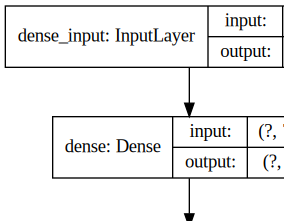

In [5]:
from IPython.display import SVG
from tensorflow.keras.utils import model_to_dot
from tensorflow.keras.utils import plot_model
import os

os.environ["PATH"] += os.pathsep + "C:/Program Files (x86)/Graphviz2.38/bin"

%matplotlib inline

plot_model(model, to_file='model.png')
SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))